# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

from sklearn.preprocessing import StandardScaler

# Load the Dataset

In [2]:
df = pd.read_excel('Data_train.xlsx')

# Check the datatype

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Check null values

In [4]:
total = df.isnull().sum().sort_values(ascending = False)
total

Total_Stops        1
Route              1
Price              0
Additional_Info    0
Duration           0
Arrival_Time       0
Dep_Time           0
Destination        0
Source             0
Date_of_Journey    0
Airline            0
dtype: int64

In [5]:
df['Route'].value_counts()



DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
CCU → RPR → HYD → BLR             1
BOM → VNS → DEL → HYD             1
BOM → CCU → HYD                   1
BOM → BBI → HYD                   1
BOM → BLR → CCU → BBI → HYD       1
Name: Route, Length: 128, dtype: int64

# Drop Null Values

In [6]:
df.dropna(inplace = True)

# Get the weekday and month

In [7]:
df['Journey_Day'] = pd.to_datetime(df['Date_of_Journey'],format ="%d/%m/%Y").dt.weekday
df['Journey_Month'] = pd.to_datetime(df['Date_of_Journey'],format ="%d/%m/%Y").dt.month
df['Journey_Date'] = pd.to_datetime(df['Date_of_Journey'],format ="%d/%m/%Y").dt.day

# Create a dictionary to Change weekday and months to numerical value.

In [8]:
dic = {'0':'Sunday','1':'Monday','2':'Tuesday','3':'Wednesday','4':'Thursday','5':'Friday','6':'Saturday'}
mon = {'1':'Jan', '2':'Feb', '3':'Mar', '4':'Apr', '5':'May', '6':'Jun', '7':'Jul', '8':'Aug',
                '9':'Sep', '10':'Oct', '11':'Nov', '12':'Dec'}
    

In [9]:
def replace_all(text, dic):
    for i, j in dic.items():
        
        text = str(text)
        
        text = text.replace(i, j)
        #print(text[0])
    return text

In [16]:
for i,j in df.iterrows():
    day = j['Journey_Day']
    Month = j['Journey_Month']
    
   
    if(day ==6 or day ==7):
        df.loc[df.Journey_Day ==day, 'weekend'] ='YES'
    else:
        df.loc[df.Journey_Day ==day, 'weekend'] ='NO'
        
    f =replace_all(day,dic)
 
    g = replace_all(Month,mon)
    
 
    df.loc[df.Journey_Day ==day, 'weekday'] =f
    df.loc[df.Journey_Month ==Month, 'month'] =g

# Get the Date of Jouyrney

In [ ]:
df['Journey_Date'] = pd.to_datetime(df['Date_of_Journey'],format ="%d/%m/%Y").dt.day

# WEEKEND VS PRICE

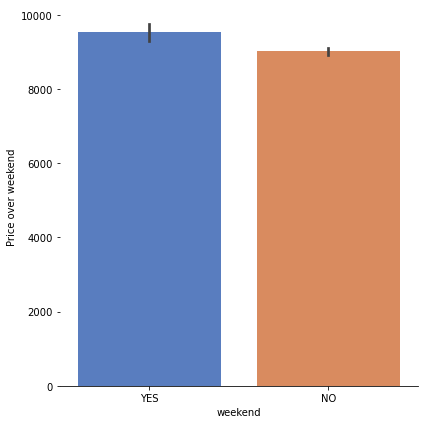

In [17]:
g = sns.factorplot(x="weekend",y="Price",data=df,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Price over weekend")

# Days vs Price

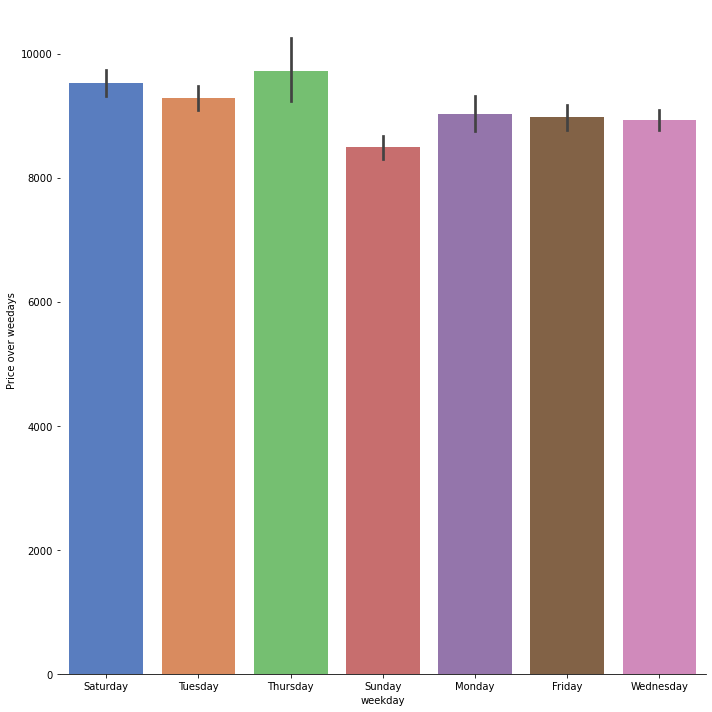

In [18]:
g = sns.factorplot(x="weekday",y="Price",data=df,kind="bar", size = 10 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Price over weedays")

# Months vs Price

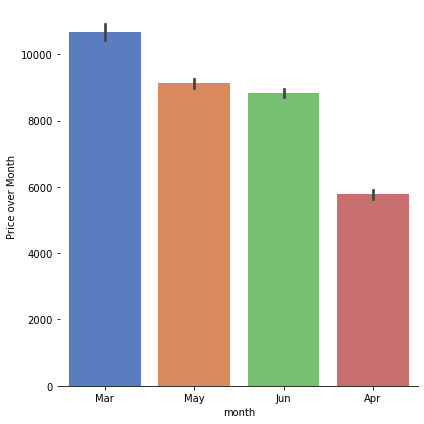

In [19]:
g = sns.factorplot(x="month",y="Price",data=df,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Price over Month")

# Date vs Price

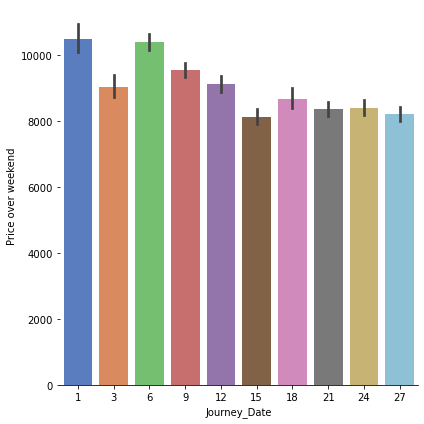

In [14]:
g = sns.factorplot(x="Journey_Date",y="Price",data=df,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Price over weekend")

# Delete date after extracting day and month

In [ ]:
df.drop('Date_of_Journey',axis =1,inplace = True)

# Get hour and minutes from departure time

In [20]:
df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_Minute'] = pd.to_datetime(df['Dep_Time']).dt.minute

# Delete Departure time

In [21]:
df.drop('Dep_Time',axis =1,inplace = True)

# Get hour and minutes from Arrival Time

In [22]:
df['Arr_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arr_Minute'] = pd.to_datetime(df['Arrival_Time']).dt.minute


# Delete Arrival Time

In [23]:
df.drop('Arrival_Time',axis =1,inplace = True)


In [24]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Date,weekday,month,Dep_Hour,Dep_Minute,weekend,Arr_Hour,Arr_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,6,3,24,Saturday,Mar,22,20,YES,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2,5,1,Tuesday,May,5,50,NO,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,6,9,Saturday,Jun,9,25,YES,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,6,5,12,Saturday,May,18,5,YES,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,4,3,1,Thursday,Mar,16,50,NO,21,35


# Convert duration into numerical format

In [25]:
duration = df['Duration'].tolist()
for d in range (len(duration)):
  
    if(len(duration[d].split())!=2):
        #print(duration[d])
        if "h" in duration[d]:
            #print(duration[d])
            duration[d] = duration[d].strip()+" 0m"
        else:
          
            duration[d] = "0h "+ duration[d].strip()
       

In [26]:
duration_hours=[]
duration_minutes=[]
for i in range (len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))
    duration_minutes.append(int(duration[i].split(sep = 'm')[0].split()[-1]))

# Add a new Column with total Minutes

In [27]:
df['Duration_hours'] =duration_hours
df['Duration_minutes'] =duration_minutes


    
    

# Delete Duration

In [28]:
df.columns
df.drop(['Duration'],axis=1,inplace = True)

In [29]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Date,weekday,month,Dep_Hour,Dep_Minute,weekend,Arr_Hour,Arr_Minute,Duration_hours,Duration_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,6,3,24,Saturday,Mar,22,20,YES,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,2,5,1,Tuesday,May,5,50,NO,13,15,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,6,9,Saturday,Jun,9,25,YES,4,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,6,5,12,Saturday,May,18,5,YES,23,30,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,4,3,1,Thursday,Mar,16,50,NO,21,35,4,45


# Drop Weekend , weekday and Month

In [30]:
df.drop(['weekend','weekday', 'month'],axis =1,inplace = True)

In [31]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

# Airline vs Price

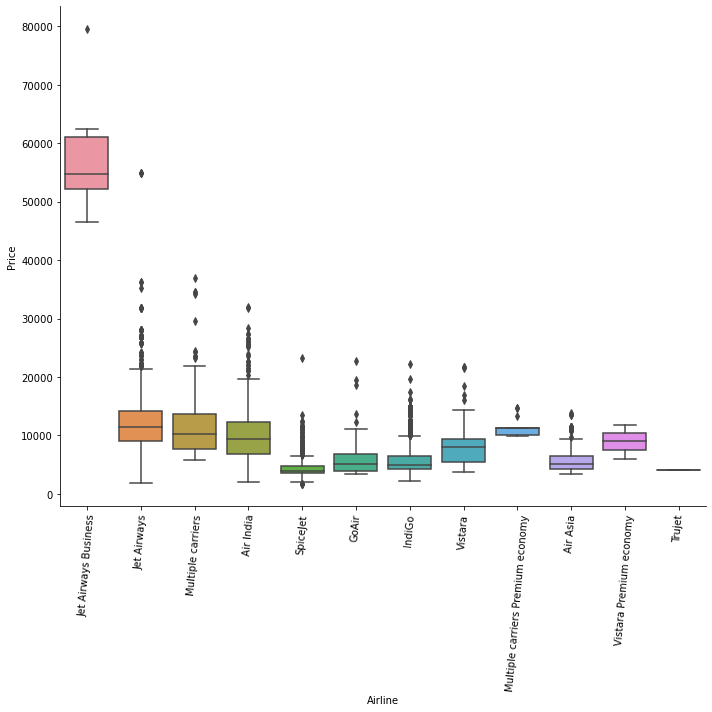

In [32]:
ax = sns.catplot(x='Airline',y='Price',data=df.sort_values('Price',ascending = False),aspect =1,kind= 'box',height=10)
plt.rcParams["xtick.labelsize"] = 16
ax.set_xticklabels(rotation=85)
plt.tight_layout()
#https://stackoverflow.com/questions/26540035/rotate-label-text-in-seaborn-factorplot

# Convert Categorical Feature Airline into numbers using One-hot encoding

In [33]:
Airline = df[['Airline']]

In [34]:
Airline = pd.get_dummies(Airline,drop_first=True)

In [35]:
Airline

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [36]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [37]:
pd.set_option('display.max_rows', None)

# Check the outlier Data

In [38]:
Threshold_high = df['Price'].quantile(0.99)
df[df['Price']>Threshold_high]

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Date,Dep_Hour,Dep_Minute,Arr_Hour,Arr_Minute,Duration_hours,Duration_minutes
123,Air India,1/03/2019,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,27430,4,3,1,23,0,19,15,20,15
396,Multiple carriers,1/03/2019,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,36983,4,3,1,12,50,19,15,6,25
486,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,26890,4,3,1,8,55,15,15,6,20
510,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,26890,4,3,1,7,0,12,25,5,25
597,Air India,6/03/2019,Mumbai,Hyderabad,BOM → JDH → DEL → HYD,2 stops,No info,25139,2,3,6,9,40,15,15,29,35
628,Jet Airways,15/03/2019,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,27210,4,3,15,22,55,5,5,6,10
657,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,52229,4,3,1,5,45,10,45,5,0
785,Air India,01/03/2019,Banglore,New Delhi,BLR → BOM → BHO → DEL,2 stops,1 Short layover,26743,4,3,1,8,50,23,25,14,35
826,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,26890,4,3,1,5,45,16,10,10,25
936,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,25735,4,3,1,22,50,19,10,20,20


In [39]:
Threshold_LOW = df['Price'].quantile(0.008)
df[df['Price']<Threshold_LOW]

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Date,Dep_Hour,Dep_Minute,Arr_Hour,Arr_Minute,Duration_hours,Duration_minutes
228,SpiceJet,21/05/2019,Mumbai,Hyderabad,BOM → HYD,non-stop,No check-in baggage included,1965,1,5,21,5,45,7,15,1,30
387,SpiceJet,18/06/2019,Mumbai,Hyderabad,BOM → HYD,non-stop,No check-in baggage included,1965,1,6,18,13,15,14,45,1,30
655,SpiceJet,3/05/2019,Mumbai,Hyderabad,BOM → HYD,non-stop,No check-in baggage included,1965,4,5,3,13,15,14,45,1,30
711,SpiceJet,12/05/2019,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,2017,6,5,12,5,45,7,15,1,30
964,SpiceJet,18/05/2019,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,2017,5,5,18,22,45,0,15,1,30
1011,SpiceJet,15/05/2019,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,2017,2,5,15,22,45,0,15,1,30
1416,Air India,18/03/2019,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,2050,0,3,18,19,30,20,45,1,15
1472,SpiceJet,21/05/2019,Mumbai,Hyderabad,BOM → HYD,non-stop,No check-in baggage included,1965,1,5,21,13,15,14,45,1,30
1513,Jet Airways,27/03/2019,Mumbai,Hyderabad,BOM → HYD,non-stop,In-flight meal not included,1840,2,3,27,2,55,4,25,1,30
1580,SpiceJet,24/06/2019,Mumbai,Hyderabad,BOM → HYD,non-stop,No check-in baggage included,1965,0,6,24,22,45,0,15,1,30


# Source vs Price

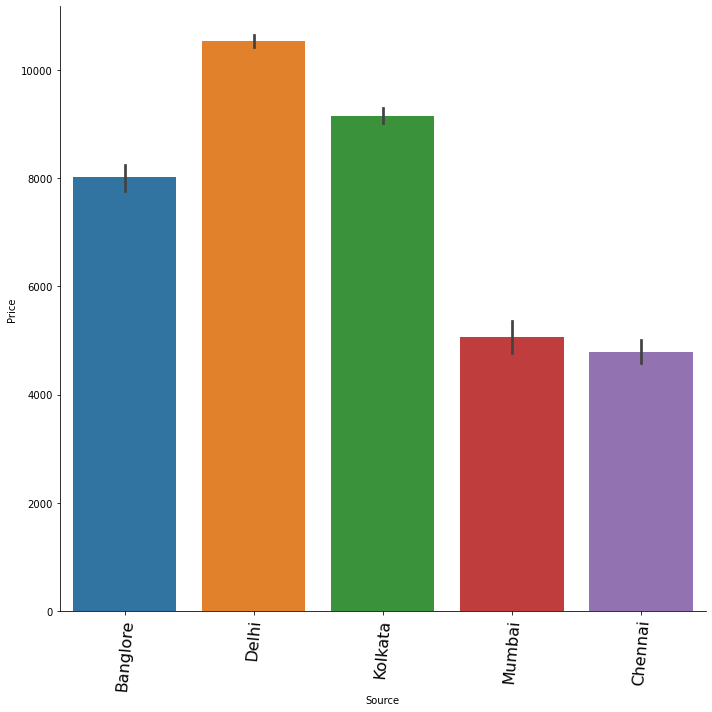

In [40]:
ax = sns.catplot(x='Source',y='Price',data=df.sort_values('Price',ascending = False),aspect =1,kind= 'bar',height=10)
plt.rcParams["xtick.labelsize"] = 16
ax.set_xticklabels(rotation=85)
plt.tight_layout()

In [41]:
Source = df[['Source']]

# Convert Categorical Feature Source into numbers using One-hot encoding

In [42]:
Source =pd.get_dummies(Source,drop_first= True)

In [43]:
Source.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Source_Chennai  10682 non-null  uint8
 1   Source_Delhi    10682 non-null  uint8
 2   Source_Kolkata  10682 non-null  uint8
 3   Source_Mumbai   10682 non-null  uint8
dtypes: uint8(4)
memory usage: 445.2 KB


In [44]:
df['Destination'].value_counts()
Destination = df[['Destination']]

# Convert Categorical Feature Destination into numbers using One-hot encoding

In [45]:
Destination = pd.get_dummies(Destination,drop_first= True)

In [46]:
Destination.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Destination_Cochin     10682 non-null  uint8
 1   Destination_Delhi      10682 non-null  uint8
 2   Destination_Hyderabad  10682 non-null  uint8
 3   Destination_Kolkata    10682 non-null  uint8
 4   Destination_New Delhi  10682 non-null  uint8
dtypes: uint8(5)
memory usage: 455.6 KB


In [47]:
df.shape

(10682, 17)

In [48]:
df[['Route','Total_Stops']]

,Route,Total_Stops
0,BLR → DEL,non-stop
1,CCU → IXR → BBI → BLR,2 stops
2,DEL → LKO → BOM → COK,2 stops
3,CCU → NAG → BLR,1 stop
4,BLR → NAG → DEL,1 stop
5,CCU → BLR,non-stop
6,BLR → BOM → DEL,1 stop
7,BLR → BOM → DEL,1 stop
8,BLR → BOM → DEL,1 stop
9,DEL → BOM → COK,1 stop


In [49]:
df['Additional_Info'].value_counts()

No info                         8347
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

# Convert Categorical Feature Additional Information into numbers using One-hot encoding

In [50]:
Add = df['Additional_Info']
Add_info =pd.get_dummies(Add,drop_first= True)
Add_info.drop(['1 Short layover', '2 Long layover', 
       'Change airports', 'In-flight meal not included',
       'No check-in baggage included', 'Red-eye flight'],axis =1,inplace = True)

# Additional Information Vs Price

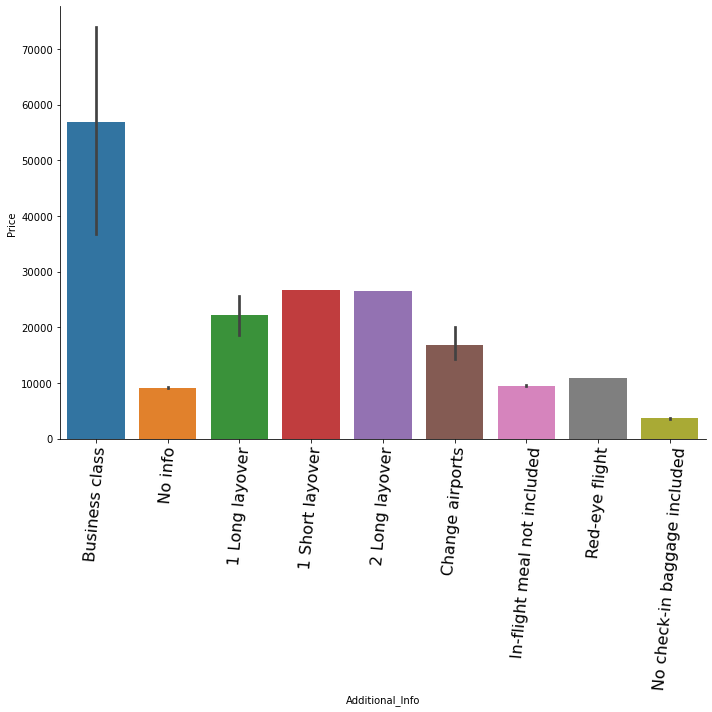

In [51]:
ax = sns.catplot(x='Additional_Info',y='Price',data=df.sort_values('Price',ascending = False),aspect =1,kind= 'bar',height=10)
plt.rcParams["xtick.labelsize"] = 16
ax.set_xticklabels(rotation=85)
plt.tight_layout()

In [52]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

# Replace Total Stops with numbers

In [53]:
df.replace({'1 stop':1,'non-stop':0,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'Journey_Date', 'Dep_Hour', 'Dep_Minute', 'Arr_Hour',
       'Arr_Minute', 'Duration_hours', 'Duration_minutes'],
      dtype='object')

In [54]:
df.drop(['Airline', 'Source', 'Destination', 'Route'],axis=1,inplace=True)

In [55]:
train = pd.concat([df,Source,Destination,Airline],axis=1)


In [59]:
train.drop(['Date_of_Journey','Additional_Info'],inplace = True,axis=1)

In [50]:
train.drop(['Date_of_Journey', 'Additional_Info','Journey_Date'],inplace =True,axis=1)

In [54]:
train.drop(['Journey_Date'],inplace =True,axis=1)

In [60]:
train.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month', 'Journey_Date',
       'Dep_Hour', 'Dep_Minute', 'Arr_Hour', 'Arr_Minute', 'Duration_hours',
       'Duration_minutes', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy'],
      dtype='object')

# Perform the preprocessing with test data separately to prevent Data Leakage

In [61]:
test = pd.read_excel('Test_set.xlsx')
test['Journey_Date'] = pd.to_datetime(test['Date_of_Journey'],format ="%d/%m/%Y").dt.day


test['Journey_Day'] = pd.to_datetime(test['Date_of_Journey'],format ="%d/%m/%Y").dt.weekday
test['Journey_Month'] = pd.to_datetime(test['Date_of_Journey'],format ="%d/%m/%Y").dt.month

for i,j in test.iterrows():
    day = j['Journey_Day']
    Month = j['Journey_Month']
    print(i)
   
    
        
    f =replace_all(day,dic)
 
    g = replace_all(Month,mon)
 
    df.loc[df.Journey_Day ==day, 'weekday'] =f
    df.loc[df.Journey_Month ==Month, 'month'] =g

test.drop('Date_of_Journey',axis =1,inplace = True)

duration1 = test['Duration'].tolist()
duration1 = test['Duration'].tolist()
for d in range (len(duration1)):
    #duration[d]=duration[d].split()
    #print(duration[d])
    #print(len(duration[d]))
    if(len(duration1[d].split())!=2):
        #print(duration[d])
        if "h" in duration1[d]:
            #print(duration[d])
            duration1[d] = duration1[d].strip()+" 0m"
        else:
            print(duration1[d])
            duration1[d] = "0h "+ duration1[d].strip()
            print(duration1[d])
            
duration_hours1=[]
duration_minutes1=[]
for i in range (len(duration1)):
    duration_hours1.append(int(duration1[i].split(sep = 'h')[0]))
    duration_minutes1.append(int(duration1[i].split(sep = 'm')[0].split()[-1]))
    
test['Duration_hours1'] =duration_hours1
test['Duration_minutes1'] =duration_minutes1

test['Arr_Hour'] = pd.to_datetime(test['Arrival_Time']).dt.hour
test['Arr_Minute'] = pd.to_datetime(test['Arrival_Time']).dt.minute
test['Dep_Hour'] = pd.to_datetime(test['Dep_Time']).dt.hour
test['Dep_Minute'] = pd.to_datetime(test['Dep_Time']).dt.minute
#test['Total_Minutes'] = test.apply(lambda row: row.Duration_hours1*60 + row.Duration_minutes1, axis=1)

Airline = test[['Airline']]
Airline = pd.get_dummies(Airline,drop_first=True)
Source = test[['Source']]
Source =pd.get_dummies(Source,drop_first= True)
Destination = test[['Destination']]
Destination =pd.get_dummies(Destination,drop_first= True)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


In [62]:

test.replace({'1 stop':0,'non-stop':0,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
#


In [63]:
test = pd.concat([test,Source,Destination,Airline],axis=1)

In [66]:
test.columns

Index(['Dep_Time', 'Arrival_Time', 'Total_Stops', 'Journey_Date',
       'Journey_Day', 'Journey_Month', 'Duration_hours1', 'Duration_minutes1',
       'Arr_Hour', 'Arr_Minute', 'Dep_Hour', 'Dep_Minute', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy'],
      dtype='object')

In [65]:
test.drop(['Duration', 'Additional_Info','Airline', 'Source', 'Destination', 'Route'],axis=1,inplace= True)

In [ ]:
#test.drop(['Duration_hours1', 'Duration_minutes1'],axis=1,inplace= True)

In [70]:
test.columns

Index(['Dep_Time', 'Arrival_Time', 'Total_Stops', 'Journey_Date',
       'Journey_Day', 'Journey_Month', 'Duration_hours1', 'Duration_minutes1',
       'Arr_Hour', 'Arr_Minute', 'Dep_Hour', 'Dep_Minute', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy'],
      dtype='object')

In [71]:
train.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month', 'Journey_Date',
       'Dep_Hour', 'Dep_Minute', 'Arr_Hour', 'Arr_Minute', 'Duration_hours',
       'Duration_minutes', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy'],
      dtype='object')

In [171]:

filtered_columns = [ 'Total_Stops', 'Journey_Day', 'Journey_Month', 'Journey_Date',
       'Dep_Hour', 'Dep_Minute', 'Arr_Hour', 'Arr_Minute', 'Duration_hours',
       'Duration_minutes', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara']

X = train.reindex(columns = filtered_columns)

In [157]:
test.shape

(2671, 30)

In [159]:
y = df['Price']

In [172]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

# Heat map to check correlation

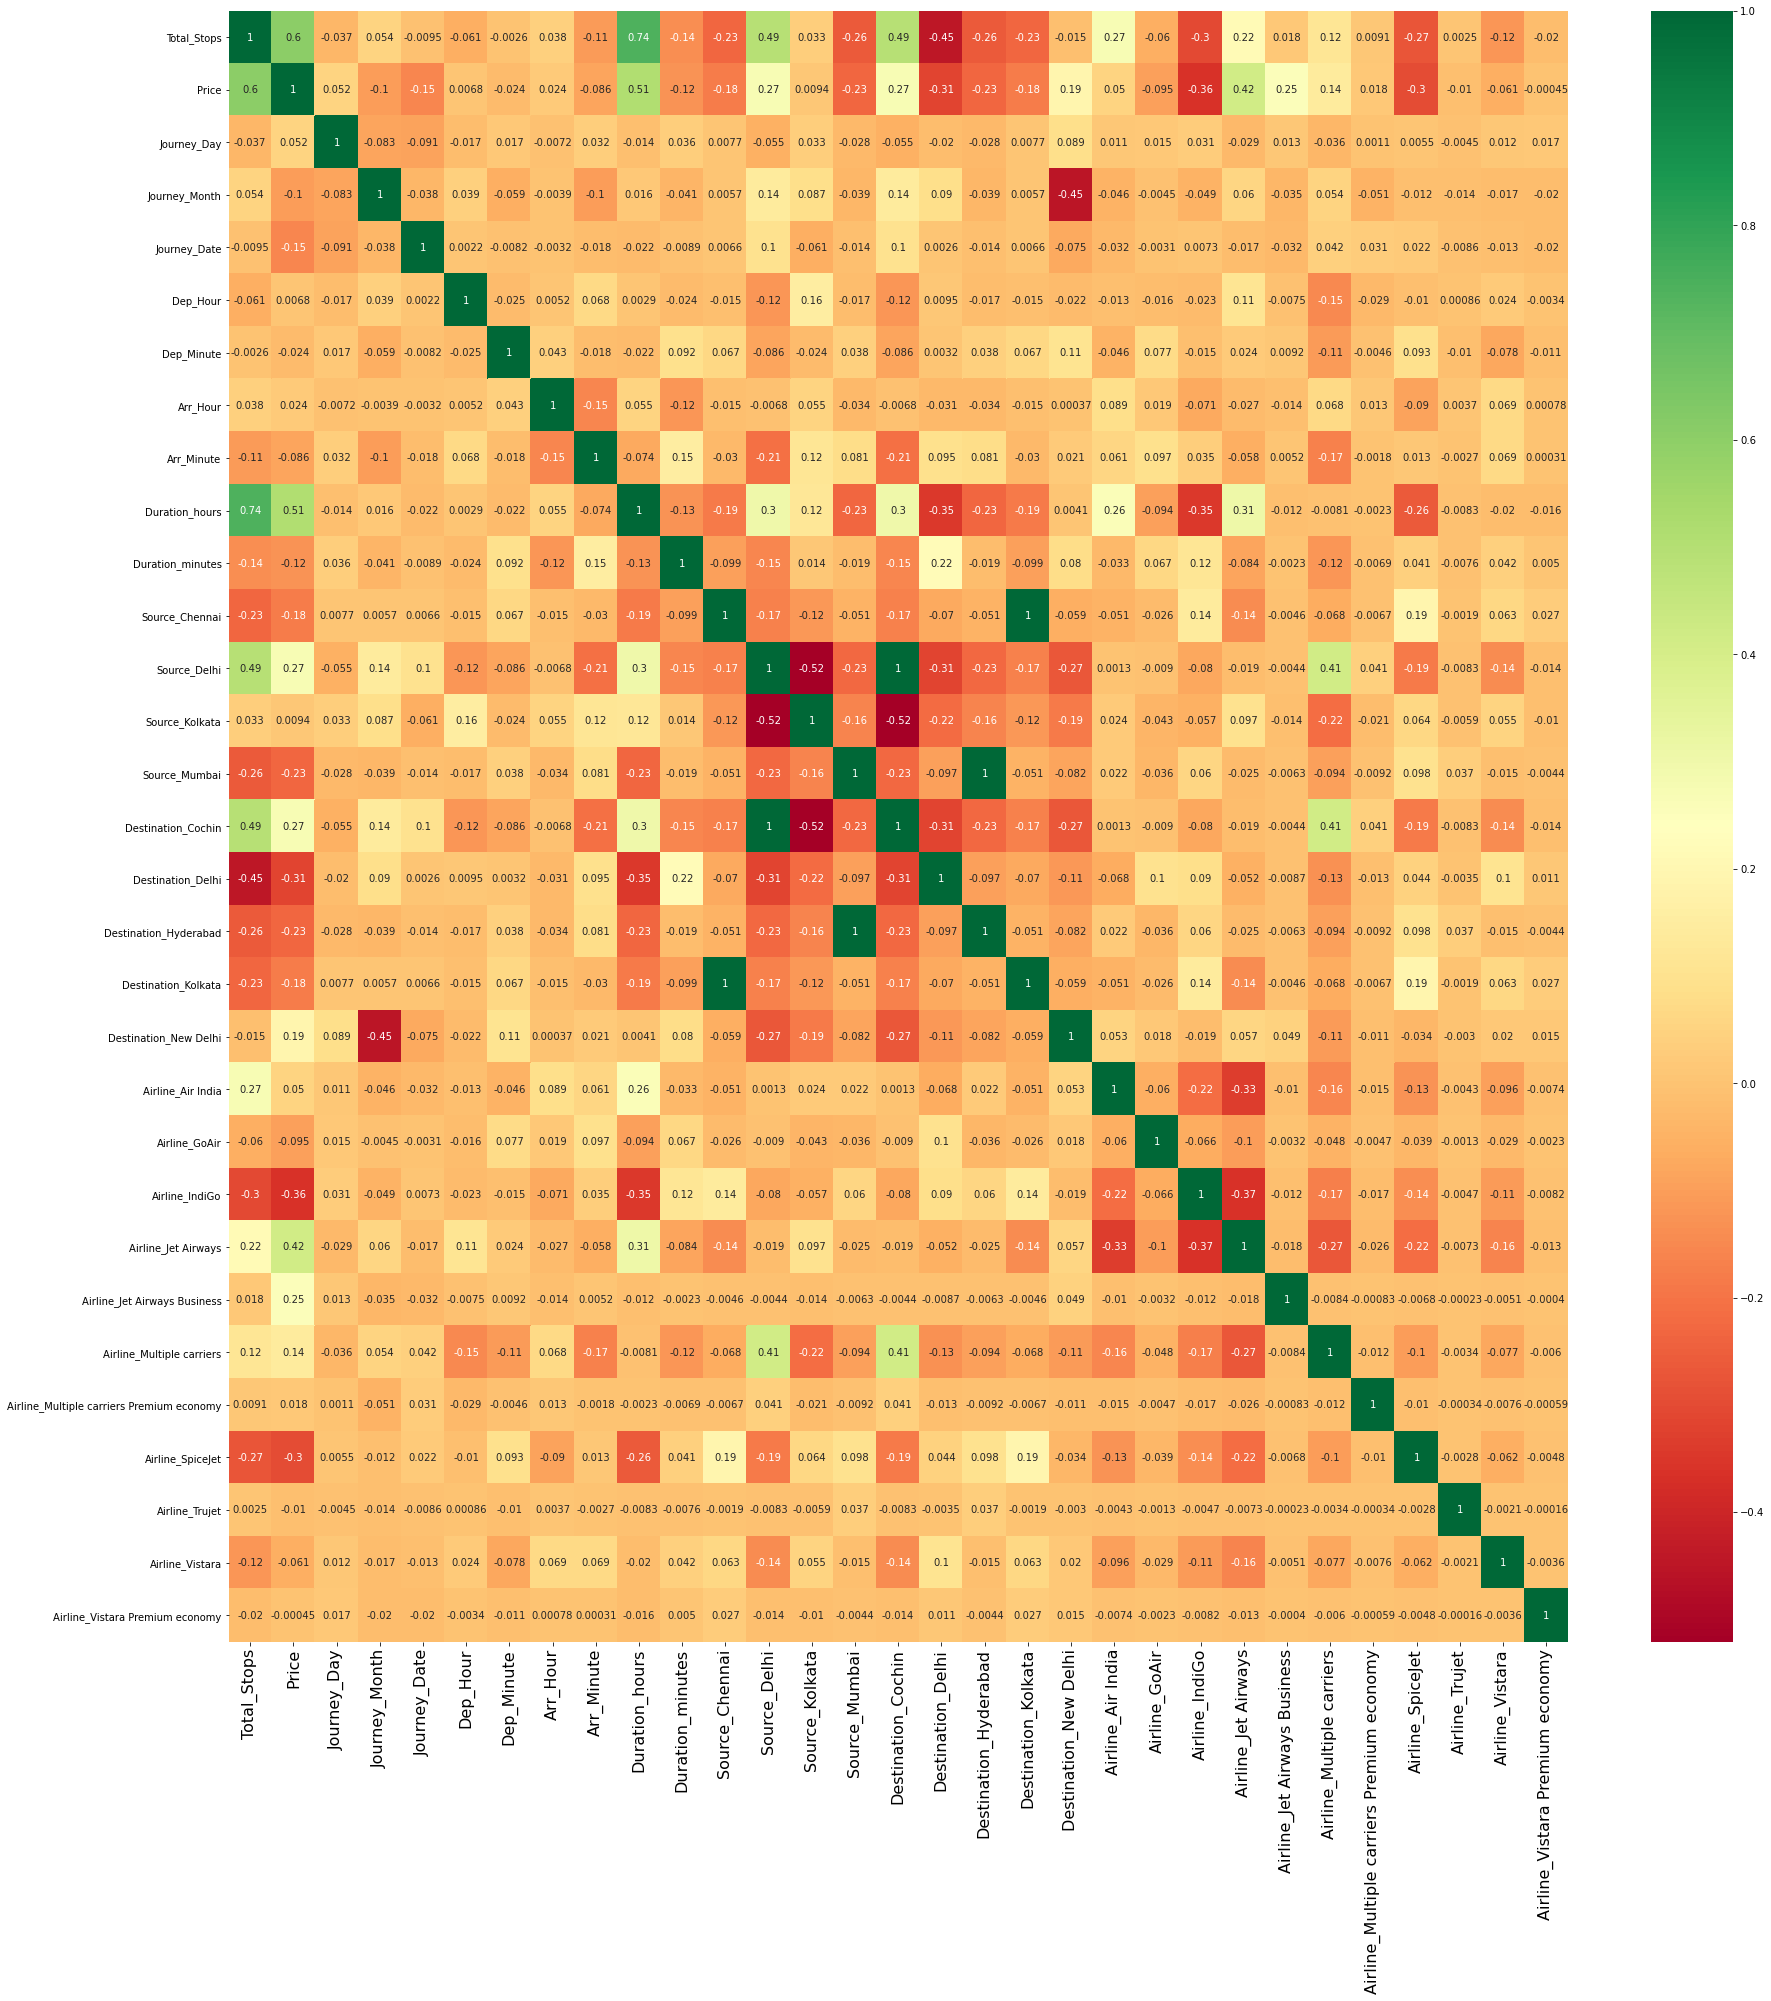

In [173]:
plt.figure(figsize=(30,30))
sns.heatmap(train.corr(),annot= True,cmap ='RdYlGn')
plt.show()

# Perform feature selection with extra tree Regressor model

In [174]:
from sklearn.ensemble import ExtraTreesRegressor
feature_selection = ExtraTreesRegressor()
feature_selection.fit(X,y)

ExtraTreesRegressor()

In [175]:
plt.figure(figsize = (12,8))
print(feature_selection.feature_importances_)

[0.21690698 0.0314447  0.05083769 0.11277551 0.02461057 0.02143422
 0.02913234 0.01906941 0.13223762 0.01733736 0.00053052 0.01166938
 0.00354518 0.00718791 0.010846   0.01553413 0.00570623 0.00046351
 0.02478662 0.01062891 0.00180459 0.01470837 0.14013635 0.06752941
 0.02023352 0.00086464 0.00275353 0.0052848 ]


<Figure size 864x576 with 0 Axes>

In [176]:
feature_importance = pd.Series(feature_selection.feature_importances_,index= X.columns)


# Plot Feature Importance

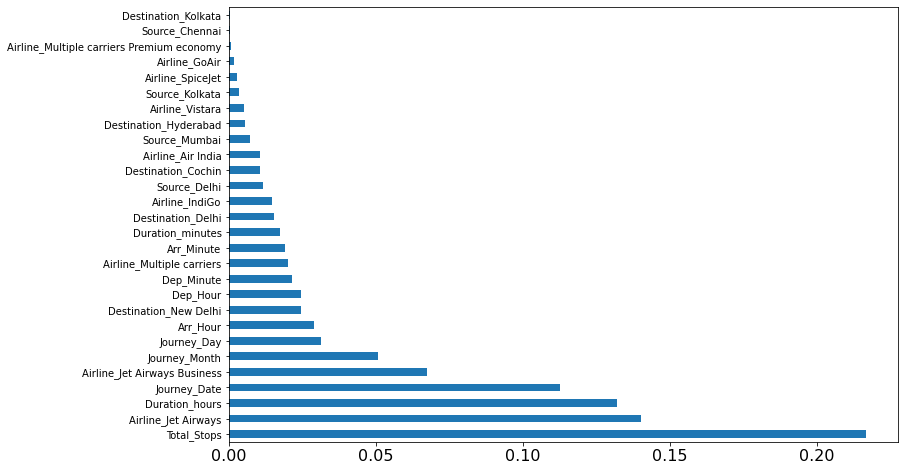

In [177]:
plt.figure(figsize = (12,8))
feature_importance.nlargest(40).plot(kind = 'barh')
plt.show()

# Split the Data set

In [189]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Fit the training data set using Random Forest Regressor

In [190]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [191]:
y_pred = reg_rf.predict(X_test)

In [192]:
reg_rf.score(X_train, y_train)

0.9532345845660907

In [193]:
reg_rf.score(X_test, y_test)

0.7996510990926926

# Dist plot shows Normal Distribution

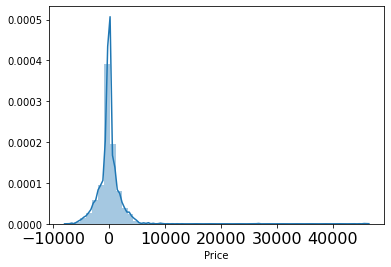

In [195]:
sns.distplot(y_test-y_pred)
plt.show()

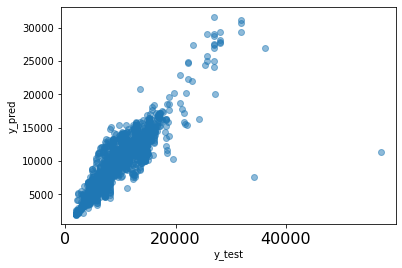

In [196]:

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [197]:
from sklearn import metrics

In [198]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1177.186321797931
MSE: 4319934.285847269
RMSE: 2078.4451606542975


In [199]:
metrics.r2_score(y_test, y_pred)

0.7996510990926926

# Perform Hyperparameter Tuning using Randomized Search CV

In [200]:
from sklearn.model_selection import RandomizedSearchCV

In [215]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [217]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [218]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv =10 , verbose=2, random_state=42, n_jobs = 1)

In [219]:
rf_random.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.5s
[CV] n_estimators=900, min_samples_split=5, min_samp

[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=  10.4s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=  10.2s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=  10.2s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=  10.2s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=  11.3s
[CV] n_estimators=700, min_samples_split=5,

[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   1.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=700, min_samples_split=10, min_sa

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 12.0min finished


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [220]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [221]:
prediction = rf_random.predict(X_test)
prediction

array([17012.13570096,  5590.90571513,  8629.61725266, ...,
        6884.13980354, 12485.89469662, 12219.33937917])

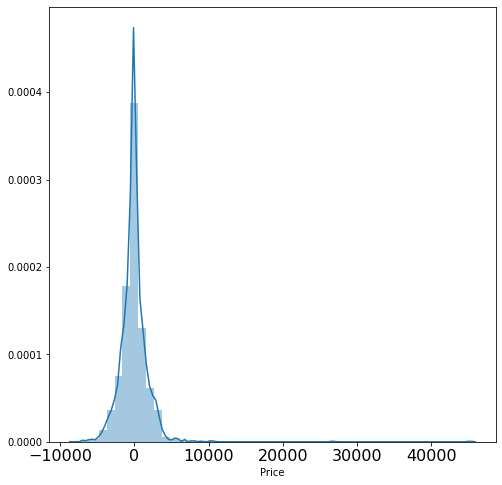

In [222]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

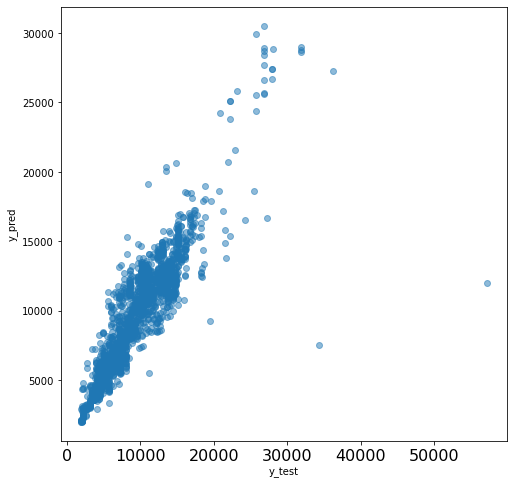

In [223]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [224]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1164.7629799642204
MSE: 4034012.653019103
RMSE: 2008.4851637537936


In [225]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [226]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [227]:
y_prediction = forest.predict(X_test)

In [228]:
metrics.r2_score(y_test, y_prediction)

0.8129115056387868